# Learning scikit-learn with Nathaniel Tucker

Notebook dedicated to follow the awesome serie of scikit-learn videos created by Nathaniel Tucker. 

Tucker's Youtube channel: https://www.youtube.com/channel/UCQTQ0AbOupKNxKKY-_x46OQ

Tucker's Github repo: https://github.com/knathanieltucker/bit-of-data-science-and-scikit-learn

I can't thank him enough for his videos and his reponses to my questions on them. This material is just me running his notebooks. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Scikit-learn's Datasets

There are three distinct kinds of dataset interfaces for different types of datasets. The simplest one is the interface for sample images, which is described below in the Sample images section.

The dataset generation functions and the svmlight loader share a simplistic interface, returning a tuple (X, y) consisting of a n_samples * n_features numpy array X and an array of length n_samples containing the targets y.
The toy datasets as well as the ‘real world’ datasets and the datasets fetched from mldata.org have more sophisticated structure. These functions return a dictionary-like object holding at least two items: an array of shape n_samples * n_features with key data (except for 20newsgroups) and a numpy array of length n_samples, containing the target values, with key target.

The datasets also contain a description in DESCR and some contain feature_names and target_names. See the dataset descriptions below for details.

In [2]:
import sklearn.datasets as datasets

## Sample Images

The scikit also embed a couple of sample JPEG images published under Creative Commons license by their authors. Those image can be useful to test algorithms and pipeline on 2D data.

In [3]:
datasets.load_sample_images()

{'DESCR': 'Image: china.jpg\nReleased under a creative commons license. [1]\nAttribution: Some rights reserved by danielbuechele [2]\nRetrieved 21st August, 2011 from [3] by Robert Layton\n\n[1] http://creativecommons.org/licenses/by/2.0/\n[2] http://www.flickr.com/photos/danielbuechele/\n[3] http://www.flickr.com/photos/danielbuechele/6061409035/sizes/z/in/photostream/\n\n\nImage: flower.jpg\nReleased under a creative commons license. [1]\nAttribution: Some rights reserved by danielbuechele [2]\nRetrieved 21st August, 2011 from [3] by Robert Layton\n\n[1] http://creativecommons.org/licenses/by/2.0/\n[2] http://www.flickr.com/photos/vultilion/\n[3] http://www.flickr.com/photos/vultilion/6056698931/sizes/z/in/photostream/\n\n\n\n',
 'filenames': ['/anaconda2/lib/python2.7/site-packages/sklearn/datasets/images/china.jpg',
  '/anaconda2/lib/python2.7/site-packages/sklearn/datasets/images/flower.jpg'],
 'images': [array([[[174, 201, 231],
          [174, 201, 231],
          [174, 201, 231

In [4]:
china = datasets.load_sample_image('china.jpg')
flower = datasets.load_sample_image('flower.jpg')

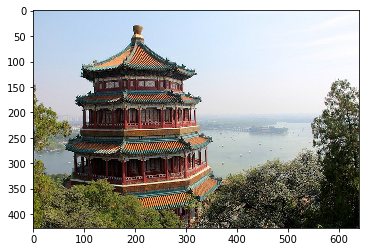

In [5]:
plt.imshow(china)

In [6]:
china.shape

(427, 640, 3)

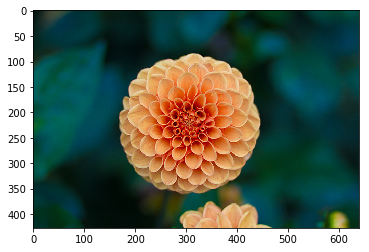

In [7]:
plt.imshow(flower)

In [8]:
flower.shape

(427, 640, 3)

## Sample Generators

In addition, scikit-learn includes various random sample generators that can be used to build artificial datasets of controlled size and complexity.

All of the generators are prefixed with the word make.

In [9]:
datasets.make_blobs?

In [10]:
X, y = datasets.make_blobs()

In [11]:
X.shape, y.shape

((100, 2), (100,))

## Toy and Fetched Datasets

Toy and Fetched Datasets

Scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.

These datasets are useful to quickly illustrate the behavior of the various algorithms implemented in the scikit. They are however often too small to be representative of real world machine learning tasks.

These datasets are prefixed with the load command.

In [12]:
data = datasets.load_boston()

In [13]:
data.keys()

['data', 'feature_names', 'DESCR', 'target']

In [14]:
data.data.shape, data.target.shape

((506, 13), (506,))

In [15]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='|S7')

In [16]:
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Fetched datasets

These are all somewhat unique with their own functions to fetch and load them. I'll go through a single one below. 
They are all prefixed with the word fetch

In [17]:
faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/dazconap/scikit_learn_data


In [18]:
faces.keys()

['images', 'data', 'target', 'DESCR']

In [19]:
faces.images.shape, faces.data.shape, faces.target.shape

((400, 64, 64), (400, 4096), (400,))

In [20]:
faces.data

array([[ 0.30991736,  0.36776859,  0.41735536, ...,  0.15289256,
         0.16115703,  0.1570248 ],
       [ 0.45454547,  0.47107437,  0.51239669, ...,  0.15289256,
         0.15289256,  0.15289256],
       [ 0.31818181,  0.40082645,  0.49173555, ...,  0.14049587,
         0.14876033,  0.15289256],
       ..., 
       [ 0.5       ,  0.53305787,  0.60743803, ...,  0.17768595,
         0.14876033,  0.19008264],
       [ 0.21487603,  0.21900827,  0.21900827, ...,  0.57438016,
         0.59090906,  0.60330576],
       [ 0.5165289 ,  0.46280992,  0.28099173, ...,  0.35950413,
         0.35537189,  0.38429752]], dtype=float32)

# 2. Supervised Learning

## Regression

We won't go over every model, in fact I will stick to as few as possible models but go over how they are used and what their commonalities are.

We will first start off by importing some toy data.

In [21]:
X, y = datasets.load_boston(return_X_y=True)

In [58]:
# First row
print X[0]
print y[0]

[ 5.1  3.5  1.4  0.2]
0


Next we will do the training. Models have two states:

1. Instantiated
2. Fit

When we instantiate the model we specify the hyperparameters of the model and nothing else.

In [24]:
from sklearn import linear_model

In [63]:
linear_model.ElasticNet?

In [26]:
m = linear_model.ElasticNet(alpha=.1, l1_ratio=.9)

The next step is fitting the model

In [27]:
m.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
m.coef_

array([-0.09726289,  0.04968684, -0.03860629,  0.96761815, -0.        ,
        3.59541405, -0.0093816 , -1.16492427,  0.27719067, -0.01465229,
       -0.77597068,  0.01026115, -0.57628314])

In [29]:
m.intercept_

26.436572165133683

In [31]:
m.predict([X[0]]) # "Cheating" by using an old value

array([ 30.77529215])

In [33]:
y[0] # Real value

24.0

In [32]:
m.score(X, y)

0.72671419328402376

In [34]:
m.score?

### CV models

Some of these models come with a CV model.

In [62]:
linear_model.ElasticNetCV?

In [36]:
m = linear_model.ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1], 
    n_alphas=20)

In [37]:
m.fit(X, y)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
       n_alphas=20, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [38]:
m.alphas_

array([[  7.24820428e+03,   5.03889940e+03,   3.50300657e+03,
          2.43526493e+03,   1.69297864e+03,   1.17694655e+03,
          8.18204764e+02,   5.68810058e+02,   3.95432655e+02,
          2.74901933e+02,   1.91109843e+02,   1.32858186e+02,
          9.23620541e+01,   6.42094347e+01,   4.46379364e+01,
          3.10319718e+01,   2.15732033e+01,   1.49975355e+01,
          1.04261786e+01,   7.24820428e+00],
       [  1.44964086e+03,   1.00777988e+03,   7.00601313e+02,
          4.87052986e+02,   3.38595727e+02,   2.35389310e+02,
          1.63640953e+02,   1.13762012e+02,   7.90865309e+01,
          5.49803866e+01,   3.82219687e+01,   2.65716373e+01,
          1.84724108e+01,   1.28418869e+01,   8.92758728e+00,
          6.20639437e+00,   4.31464065e+00,   2.99950710e+00,
          2.08523573e+00,   1.44964086e+00],
       [  1.03545775e+03,   7.19842772e+02,   5.00429509e+02,
          3.47894990e+02,   2.41854091e+02,   1.68135222e+02,
          1.16886395e+02,   8.12585797e+01

In [39]:
m.mse_path_

array([[[  52.99352711,  154.44755359,  128.19461458],
        [  56.20888556,  154.44755359,  128.19461458],
        [  59.56775676,  140.16255422,  128.19461458],
        [  62.56212311,  130.01462871,  128.19461458],
        [  65.00930369,  122.90575445,  128.19461458],
        [  66.28730005,  117.98424417,   89.26949358],
        [  67.25358679,  114.65331176,   70.61239504],
        [  67.97056805,  112.38454687,   63.7980148 ],
        [  67.85053984,  110.83163868,   61.18157603],
        [  66.09102819,  107.9605525 ,   62.10261909],
        [  61.99689709,  103.17809863,   62.77477574],
        [  57.54356331,   98.64460928,   63.27678679],
        [  53.0199392 ,   94.4088015 ,   62.99800295],
        [  48.64224565,   90.29231151,   61.72902098],
        [  44.988768  ,   85.79807305,   60.63785356],
        [  40.75282972,   81.64986225,   60.67928842],
        [  36.39345971,   77.94892242,   61.02133599],
        [  32.3990042 ,   74.14840534,   61.93407876],
        [ 

In [40]:
m.alpha_

1.4496408567545185

In [41]:
m.l1_ratio_

0.5

In [42]:
m.predict([X[0]])

array([ 30.89195578])

In [43]:
m.score(X, y)

0.67126663940540487

## Classification

Okay this one is quite quick. And is very much so the same as the above. So to cut to the chase, I'll train a Cross Validated Logistic Regression.

In [44]:
X, y = datasets.load_iris(return_X_y=True)

In [45]:
d = datasets.load_iris()

print d.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [46]:
linear_model.LogisticRegressionCV?

One thing you might notice here is that we have the option of parallelization!

In [47]:
m = linear_model.LogisticRegressionCV(Cs=10, n_jobs=2)

In [48]:
m.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=2, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [50]:
m.coef_

array([[-0.28578072,  0.26274729, -1.01008572, -0.41231485],
       [-0.24956474, -2.77466306,  1.28833593, -2.68062922],
       [-1.88077544, -2.43946122,  5.90967252,  7.34015856]])

In [51]:
m.predict([X[0]])

array([0])

In [52]:
y[0] # Correct prediction

0

In [53]:
m.predict_proba([X[0]])

array([[  9.12028943e-01,   8.79710573e-02,   4.00346941e-14]])

In [54]:
m.predict_log_proba([X[0]])

array([[ -0.09208355,  -2.43074741, -30.84902996]])

In [55]:
m.score(X, y)

0.96666666666666667

In [56]:
m.score?

# 3. Ensemble Methods

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

- In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

Examples: Bagging methods, Forests of randomized trees, ...

- By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

Examples: AdaBoost, Gradient Tree Boosting, ...

## Bagging Meta Estimator

In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. In many cases, bagging methods constitute a very simple way to improve with respect to a single model, without making it necessary to adapt the underlying base algorithm. As they provide a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).

Bagging methods come in many flavours but mostly differ from each other by the way they draw random subsets of the training set:

- When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting
- When samples are drawn with replacement, then the method is known as Bagging
- When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces
- Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches

In scikit-learn, bagging methods are offered as a unified BaggingClassifier meta-estimator (resp. BaggingRegressor), taking as input a user-specified base estimator along with parameters specifying the strategy to draw random subsets. In particular, max_samples and max_features control the size of the subsets (in terms of samples and features), while bootstrap and bootstrap_features control whether samples and features are drawn with or without replacement. When using a subset of the available samples the generalization accuracy can be estimated with the out-of-bag samples by setting oob_score=True.

To get started, let's import some data

In [66]:
X, y = datasets.load_iris(return_X_y=True)

Notice that we again see parallelization!

Next let's check out the features of the BaggingClassifier (the BaggingRegressor is very similar)

In [67]:
from sklearn.ensemble import BaggingClassifier

BaggingClassifier?

Now that we have a feel for it, let's pair it with a classifier. And for this we will use KNN.

In [68]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier(n_neighbors=3)

In [69]:
bag = BaggingClassifier(
    m, 
    max_samples=.5, 
    max_features=2, 
    n_jobs=2,
    oob_score=True)

In [70]:
bag.fit(X, y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=2,
         max_samples=0.5, n_estimators=10, n_jobs=2, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [71]:
bag.oob_score_

0.95999999999999996

In [72]:
bag.predict([X[0]])

array([0])

In [73]:
bag.predict_proba([X[0]])

array([[ 1.,  0.,  0.]])

In [74]:
bag.score(X, y)

0.95999999999999996

## Random Forests

Random forests are somewhat special. They happen to be so frequently used a bagging method that they have become their own method. They are in that way the same as a classic Supervised Estimator with all the base functionality, plus a little extra bagging goodness.

In [77]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier?

In [78]:
m = RandomForestClassifier(n_estimators=20, oob_score=True)

In [79]:
m.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [80]:
m.predict([X[0]])

array([0])

In [81]:
m.score(X, y)

1.0

## AdaBoost

The module sklearn.ensemble includes the popular boosting algorithm AdaBoost, introduced in 1995 by Freund and Schapire.

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights w_1, w_2, ..., w_N to each of the training samples. Initially, those weights are all set to w_i = 1/N, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence

In [82]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoostClassifier?

In [83]:
m = AdaBoostClassifier(base_estimator=None, n_estimators=100)

In [84]:
m.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [85]:
m.score(X, y)

0.97333333333333338

## Gradient Tree Boosting

Gradient Tree Boosting or Gradient Boosted Regression Trees (GBRT) is a generalization of boosting to arbitrary differentiable loss functions. GBRT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems. Gradient Tree Boosting models are used in a variety of areas including Web search ranking and ecology.

The advantages of GBRT are:

- Natural handling of data of mixed type (= heterogeneous features)
- Predictive power
- Robustness to outliers in output space (via robust loss functions)

The disadvantages of GBRT are:
- Scalability, due to the sequential nature of boosting it can hardly be parallelized.

The module sklearn.ensemble provides methods for both classification and regression via gradient boosted regression trees.

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

GradientBoostingClassifier?

In [87]:
m = GradientBoostingClassifier(n_estimators=10)

m.fit(X, y)

m.score(X, y)

0.99333333333333329

Every estimator has a warm start parameter. If warm_start is set to false, the estimator that fits data for a second time will get rid of the old data. If set to true, the estimator fitting data again will retain the information from the old data,  and even add new params.

In [88]:
m.set_params(n_estimators=20, warm_start=True)

m.fit(X, y)

m.score(X, y)

1.0

It is important to understand the predictive power for each feature:

In [89]:
m.feature_importances_

array([ 0.00270583,  0.03857878,  0.49991224,  0.45880314])

## Voting Classifier

The idea behind the voting classifier implementation is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

In [91]:
from sklearn.ensemble import VotingClassifier

VotingClassifier?

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


m = VotingClassifier(
    estimators=[('lr', LogisticRegression()), 
                ('rf', RandomForestClassifier()), 
                ('gnb', GaussianNB())], 
    voting='hard')

In [93]:
m.fit(X, y)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...lse, random_state=None, verbose=0,
            warm_start=False)), ('gnb', GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [95]:
m.score(X, y)

0.99333333333333329

# 4. Multiclass and Multi Label Algorithms

The sklearn.multiclass module implements meta-estimators to solve multiclass and multilabel classification problems by decomposing such problems into binary classification problems. Multitarget regression is also supported.

- Multiclass classification means a classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multiclass classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time.
- Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A text might be about any of religion, politics, finance or education at the same time or none of these.
- Multioutput regression assigns each sample a set of target values. This can be thought of as predicting several properties for each data-point, such as wind direction and magnitude at a certain location.
- Multioutput-multiclass classification and multi-task classification means that a single estimator has to handle several joint classification tasks. This is both a generalization of the multi-label classification task, which only considers binary classification, as well as a generalization of the multi-class classification task. The output format is a 2d numpy array or sparse matrix.

The set of labels can be different for each output variable. For instance, a sample could be assigned “pear” for an output variable that takes possible values in a finite set of species such as “pear”, “apple”; and “blue” or “green” for a second output variable that takes possible values in a finite set of colors such as “green”, “red”, “blue”, “yellow”...

This means that any classifiers handling multi-output multiclass or multi-task classification tasks, support the multi-label classification task as a special case. Multi-task classification is similar to the multi-output classification task with different model formulations. For more information, see the relevant estimator documentation.

All scikit-learn classifiers are capable of multiclass classification, but the meta-estimators offered by sklearn.multiclass permit changing the way they handle more than two classes because this may have an effect on classifier performance (either in terms of generalization error or required computational resources).

## Multilabel classification format

In multilabel learning, the joint set of binary classification tasks is expressed with label binary indicator array: each sample is one row of a 2d array of shape (n_samples, n_classes) with binary values: the one, i.e. the non zero elements, corresponds to the subset of labels. An array such as np.array([[1, 0, 0], [0, 1, 1], [0, 0, 0]]) represents label 0 in the first sample, labels 1 and 2 in the second sample, and no labels in the third sample.

Producing multilabel data as a list of sets of labels may be more intuitive. The MultiLabelBinarizer transformer can be used to convert between a collection of collections of labels and the indicator format.

This is skipping ahead by a couple of lessons (we have not seen transform before!) But keep this in the back of your mind for when we get there and just memorize this for now

In [96]:
from sklearn.preprocessing import MultiLabelBinarizer

y = [[2, 3, 4], [2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2]] # sklearn does not deal with this type of data so we transform it

MultiLabelBinarizer().fit_transform(y)

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])

## One vs Rest

This strategy, also known as one-vs-all, is implemented in OneVsRestClassifier. The strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and only one classifier, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy and is a fair default choice.

In [97]:
from sklearn import datasets

from sklearn.multiclass import OneVsRestClassifier

OneVsRestClassifier?

In [98]:
from sklearn.svm import LinearSVC

# Note that this also can OneVsRest
LinearSVC?

In [99]:
X, y = datasets.load_iris(return_X_y=True)

m = OneVsRestClassifier(LinearSVC())

m.fit(X, y)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [100]:
m.classes_, m.multilabel_

(array([0, 1, 2]), False)

In [101]:
m.score(X, y)

0.96666666666666667

In [102]:
m.coef_

array([[ 0.1842389 ,  0.45123031, -0.80794596, -0.45071485],
       [ 0.05130154, -0.88926401,  0.40491706, -0.93868074],
       [-0.85073634, -0.98666297,  1.38098768,  1.86536663]])

Linear svc has that built-in multi_class strategy (see multi_class parameter, by default ovr). You would use it when these classifiers don't have it built-in

In [104]:
LinearSVC().fit(X, y).score(X, y)

0.96666666666666667

## One Vs One

OneVsOneClassifier constructs one classifier per pair of classes. At prediction time, the class which received the most votes is selected. In the event of a tie (among two classes with an equal number of votes), it selects the class with the highest aggregate classification confidence by summing over the pair-wise classification confidence levels computed by the underlying binary classifiers.

Since it requires to fit n_classes * (n_classes - 1) / 2 classifiers, this method is usually slower than one-vs-the-rest, due to its O(n_classes^2) complexity. However, this method may be advantageous for algorithms such as kernel algorithms which don’t scale well with n_samples. This is because each individual learning problem only involves a small subset of the data whereas, with one-vs-the-rest, the complete dataset is used n_classes times.

In [105]:
from sklearn.multiclass import OneVsOneClassifier

OneVsOneClassifier?

In [106]:
m = OneVsOneClassifier(
    LinearSVC())

m.fit(X, y)

OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [107]:
m.estimators_

(LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0))

It developed 3 classifiers: Class 1 vs Class 2 - Class 1 vs. Class 3 - Class 2 vs. Class 3

In [108]:
m.score(X, y)

0.97999999999999998

## Error Correcting Output Codes

Output-code based strategies are fairly different from one-vs-the-rest and one-vs-one. With these strategies, each class is represented in a Euclidean space, where each dimension can only be 0 or 1. Another way to put it is that each class is represented by a binary code (an array of 0 and 1). The matrix which keeps track of the location/code of each class is called the code book. The code size is the dimensionality of the aforementioned space. Intuitively, each class should be represented by a code as unique as possible and a good code book should be designed to optimize classification accuracy.

At fitting time, one binary classifier per bit in the code book is fitted. At prediction time, the classifiers are used to project new points in the class space and the class closest to the points is chosen.

In OutputCodeClassifier, the code_size attribute allows the user to control the number of classifiers which will be used. It is a percentage of the total number of classes.

A number between 0 and 1 will require fewer classifiers than one-vs-the-rest. In theory, log2(n_classes) / n_classes is sufficient to represent each class unambiguously. However, in practice, it may not lead to good accuracy since log2(n_classes) is much smaller than n_classes.

A number greater than 1 will require more classifiers than one-vs-the-rest. In this case, some classifiers will in theory correct for the mistakes made by other classifiers, hence the name “error-correcting”. In practice, however, this may not happen as classifier mistakes will typically be correlated. The error-correcting output codes have a similar effect to bagging.

In [109]:
from sklearn.multiclass import OutputCodeClassifier

OutputCodeClassifier?

In [110]:
m = OutputCodeClassifier(LinearSVC(), code_size=2)

m.fit(X, y)

OutputCodeClassifier(code_size=2,
           estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
           n_jobs=1, random_state=None)

In [111]:
m.estimators_

[LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max

In [112]:
m.score(X, y)

0.88

## Multiple Output Regression and Classification

Multioutput regression support can be added to any regressor with MultiOutputRegressor. This strategy consists of fitting one regressor per target. Since each target is represented by exactly one regressor it is possible to gain knowledge about the target by inspecting its corresponding regressor. As MultiOutputRegressor fits one regressor per target it can not take advantage of correlations between targets.

Multioutput classification support can be added to any classifier with MultiOutputClassifier. This strategy consists of fitting one classifier per target. This allows multiple target variable classifications. The purpose of this class is to extend estimators to be able to estimate a series of target functions (f1,f2,f3...,fn) that are trained on a single X predictor matrix to predict a series of reponses (y1,y2,y3...,yn).

In [113]:
from sklearn.datasets import make_regression

# Make a dataset
X, y = make_regression(n_samples=10, n_targets=3, random_state=1)

In [114]:
from sklearn.multioutput import MultiOutputRegressor

from sklearn.ensemble import GradientBoostingRegressor

MultiOutputRegressor(
    GradientBoostingRegressor(random_state=0)).fit(X, y).score(X, y)

0.99999999911789184

# 5. Feature Selection

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

## Remove Low Var Features

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

Again we are starting to see fit and fit_transform pop up again. Sklearn provides a ton of functionality that's not just prediction. Some of the functionality is preprocessing the data. Again these are like models (they can only rely on the training data) but don't really predict anything. Thus they do have a fit method, but don't have a predict method. We will see two examples of this type of paradigm below.

In [115]:
from sklearn.feature_selection import VarianceThreshold

# 3 binary features to start off
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

sel.fit(X) # learns in an unsupervised way

sel.transform(X) # It is not a prediction now

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

Important: it only looks at the training data to figure this out! Remove low variance features from the training data

In [116]:
sel.fit_transform(X) # Both fit and transform at the same time

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

## Univariate Feature Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the k highest scoring features
- SelectPercentile removes all but a user-specified highest scoring percentage of features 
- Using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.
- GenericUnivariateSelect allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

These objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile):

- For regression: f_regression, mutual_info_regression
- For classification: chi2, f_classif, mutual_info_classif

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

In [130]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SelectKBest?

In [118]:
X, y = load_iris(return_X_y=True)

sel = SelectKBest(chi2, k=2) # How good are these features in the model? Choose the top 2

sel.fit(X, y)

SelectKBest(k=2, score_func=<function chi2 at 0x11352a938>)

In [120]:
sel.transform(X).shape # Now 2 features

(150, 2)

In [121]:
sel.scores_ # Each of these features have a score to rank them

array([  10.81782088,    3.59449902,  116.16984746,   67.24482759])

## Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and weights are assigned to each one of them. Then, features whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

So it is very important to normalize these features in linear models!

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

RFECV?

RFECV - It takes an estimator, a CV method, and a scoring

In [131]:
m = RFECV(RandomForestClassifier(), scoring='accuracy') 
# Needs a model that has a feature importance (in the coefficient or given by Random Forest) in order to operate
# It will recursively eliminate features until it reaches the best CV score

In [124]:
m.fit(X, y) # returns you a model

RFECV(cv=None,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [125]:
m.score(X, y)

0.99333333333333329

## Feature selection using SelectFromModel

SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or featureimportances attribute after fitting. The features are considered unimportant and removed, if the corresponding coef_ or featureimportances values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”.

For examples on how it is to be used refer to the sections below.

In [132]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

SelectFromModel?

In [127]:
m = SelectFromModel(LinearSVC(C=0.01, penalty='l1', dual=False))

m.fit(X, y)

SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
        norm_order=1, prefit=False, threshold=None)

In [128]:
m.transform(X).shape

(150, 3)

A little bit more complex!

In [133]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

print X.shape

m = SelectFromModel(LassoCV()) # Lasso is Linear Regression with L1 penalization

m.fit(X, y)

m.transform(X).shape

(506, 13)


(506, 10)

We started off with 13 features and dropped down to 10

When we use these techniques as part of a pipeline we don't need to know what the final features are (and if we do cross validation the features may change in each validation). But if you want to know what the features are as a side step you can use get_support. These models have a get_support() function that will tell you what features they use. 

In [134]:
m.get_support()

array([ True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True], dtype=bool)

# 6. Feature Transformation

I am going to show off only two parts of the massive quantity of code in the unsupervised learning section of sklearn. And they can be put into this single bucket:

- Feature Transformation
- Exploratory Data Analysis

## Clustering

Clustering of unlabeled data can be performed with the module sklearn.cluster. Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the labels_ attribute.

### Kmeans

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

Let's check out how it is used

In [135]:
from sklearn.cluster import KMeans

KMeans?

In [136]:
X, y = load_iris(return_X_y=True)

In [137]:
cluster = KMeans(n_clusters=3)

In [138]:
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [139]:
cluster.predict(X) # predicts which cluster each sample is in

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [140]:
from sklearn.tree import DecisionTreeClassifier

m = DecisionTreeClassifier(max_depth=2)

In [141]:
m.fit(cluster.predict(X)[:, None], y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [142]:
m.score(cluster.predict(X)[:, None], y)

0.89333333333333331

This sometimes can be a good feature augmentation, e.g. which cluster we think they are part of, and also for visualization. Mostly for data augmentation!

## Principal component analysis (PCA)

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a transformer object that learns n components in its fit method, and can be used on new data to project it on these components.

The optional parameter whiten=True makes it possible to project the data onto the singular space while scaling each component to unit variance. This is often useful if the models down-stream make strong assumptions on the isotropy of the signal: this is for example the case for Support Vector Machines with the RBF kernel and the K-Means clustering algorithm.

In [148]:
from sklearn.decomposition import PCA

PCA?

In [144]:
from sklearn.svm import SVC

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

X_pca.shape # Only 2 dimensions now

(150, 2)

In [145]:
SVC().fit(X_pca, y).score(X_pca, y)

0.95333333333333337

Variance for each principal component:

In [149]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

These are the main ways for data augmentation: clustering and PCA! Some have a predict method (clustering), others have a transofrm method (PCA). PCA is specifically used as part of a pipeline. 

http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

Text(0.5,1,u'PCA of IRIS dataset')

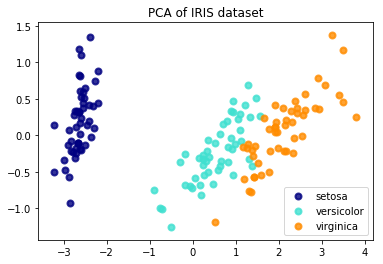

In [151]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
X_r = PCA(n_components=2).fit(X).transform(X)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

# 7. Density Estimation

Density estimation walks the line between unsupervised learning, feature engineering, and data modeling. Some of the most popular and useful density estimation techniques are mixture models such as Gaussian Mixtures (sklearn.mixture.GaussianMixture), and neighbor-based approaches such as the kernel density estimate (sklearn.neighbors.KernelDensity). Gaussian Mixtures are discussed more fully in the context of clustering, because the technique is also useful as an unsupervised clustering scheme.

Density estimation is a very simple concept, and most people are already familiar with one common density estimation technique: the histogram.

DE is trying to make some assumptions about the distribution of your underlying data

## Kernel Density Estimation

Kernel density estimation in scikit-learn is implemented in the sklearn.neighbors.KernelDensity estimator, which uses the Ball Tree or KD Tree for efficient queries (see Nearest Neighbors for a discussion of these). Though the above example uses a 1D data set for simplicity, kernel density estimation can be performed in any number of dimensions, though in practice the curse of dimensionality causes its performance to degrade in high dimensions.

The kernel density estimator can be used with any of the valid distance metrics (see sklearn.neighbors.DistanceMetric for a list of available metrics), though the results are properly normalized only for the Euclidean metric. One particularly useful metric is the Haversine distance which measures the angular distance between points on a sphere.

In [153]:
from sklearn.neighbors.kde import KernelDensity

# Function signature
KernelDensity?
# KD tries to make a distribution of your data. The way it does it is each data point represents a Gaussian, 
# then we add all these Gaussians, we normalize, we get something that looks like a distribution,
# these Gaussians have some bandwith which is the variance
# You can change the kernel, there is work that shows that it does not really matter

In [156]:
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) # Our data array with 2 features
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X) # Fitting a Guassian distribution to your data

In [157]:
kde.score_samples(X) # Score function, particular to KD, we will not see that anywhere else in sklearn

array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])

Result: it expects all these features coming from the distribution for the most part. They are the data set anyway

In [158]:
kde.score_samples([[32, 4]])

array([-10562.91076071])

However, if we were to put something that was not in the original datastet like [32, 4]. That's nowhere where we are.

In [159]:
kde.sample(1) # Instead of scoring samples, we can also sample from the distribution

array([[ 0.9003665 ,  0.92609766]])

Interesting way to do predictions and modelling like data transformation or augmentation:

In [160]:
X, y = load_iris(return_X_y=True)

In [161]:
# For each class, we fit an KDE
estimators = []
for c in [0, 1, 2]:
    m = KernelDensity().fit(X[y == c])
    estimators.append(m)

# For each KDE, we score the sample from the first one
for estimator in estimators:
    print estimator.score_samples([X[0]])

[-3.8262878]
[-8.13952384]
[-12.91720053]


It shows what is the probability that that sample came from each of those estimators. 

In [162]:
y[0]

0

It corresponds to the first class (Class 0) which is the correct answer and it has a much better score in the estimators (-3.8262878).

# 8. Cross Validation: evaluating estimator performance

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function. Let’s load the iris data set to fit a linear support vector machine on it:

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [3]:
train_test_split?

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
     iris.data, iris.target, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

((90, 4), (90,))

In [5]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [6]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.96666666666666667

In [7]:
clf.score(X_train, y_train)

0.98888888888888893

On the train data, the model performs better because it has already seen that data!

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.
However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

- A model is trained using k-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is very small.

In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score?

In [10]:
clf = svm.SVC(kernel='linear', C=1)

scores = cross_val_score(clf, iris.data, iris.target, cv=5)

scores

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])

In [11]:
clf = svm.SVC(kernel='linear', C=1)

scores = cross_val_score(clf, iris.data, iris.target, cv=2)

scores

array([ 0.98666667,  0.94666667])

In [12]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.04)


By looking at the mean of the scores and their standard deviation, I expect to at least do better than 93% (97% - 4%) on the actual test data!

In [27]:
scores = cross_val_score(
     clf, iris.data, iris.target, cv=5, scoring='f1_macro')

scores

array([ 0.96658312,  1.        ,  0.96658312,  0.96658312,  1.        ])

No need to use accuracy, you can specify your own scoring method!

In [13]:
from sklearn.model_selection import ShuffleSplit

ShuffleSplit?

In [14]:
n_samples = iris.data.shape[0]

cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

cross_val_score(clf, iris.data, iris.target, cv=cv)

array([ 0.97777778,  0.97777778,  1.        ])

In addition, you don't have to use the CV they provide, you can use your own, like ShuffleSplit!

In [15]:
from sklearn.model_selection import cross_val_predict

cross_val_predict?

In [16]:
predicted = cross_val_predict(clf, iris.data, iris.target, cv=10)

predicted.shape

(150,)

Not used very often: You can also use cross_val_predict to get unbiased predictions from your estimator that you can use. Predictions are made by models not trained with that test data!

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(iris.target, predicted)

0.97333333333333338

## Cross validation iterators

In [20]:
from sklearn.model_selection import KFold

KFold?

KFold takes a couple of parameteres: number of splits and shuffle (also random_state):

In [22]:
kf = KFold(n_splits=2, shuffle=True)

X = ["a", "b", "c", "d"]
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[0 3] [1 2]
[1 2] [0 3]


No "a", "b", "c" or "d" in the resulting data! What's going on?
In KFold CV, we split our Xs and we provide the indices (indices for the train and indices for the test)! They can be used to pick up a model a train it on the training data and test it on the test data! CV just splits your data!
In the example [0 3] are used for training and [1 2] are used for testing, the second split is the same thing but the other way around (reverve!). I get every single thing tested in an unbiased manner! The more of them I get, less variance I am going to be having.

The rule of thumb is 10 CV folds (10 to 5 folds)!

In [30]:
kf = KFold(n_splits=4, shuffle=True) # 4 folds -> 4 examples in our test set

X = ["a", "b", "c", "d"]
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[0 2 3] [1]
[0 1 3] [2]
[1 2 3] [0]
[0 1 2] [3]


### Stratification

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.

Important: Stratified - The folds are made by preserving the percentage of samples for each class.

In [31]:
from sklearn.model_selection import StratifiedKFold

StratifiedKFold?

In [25]:
X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # Only two classes: 0s and non 0s
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


It makes sure I include a 0 on the test set:

- 1st. fold: 0 and 1
- 2sd. fold: 2
- 3rd. fold: 3

Good for class imbalance!

### Grouped Data

The i.i.d. assumption is broken if the underlying generative process yield groups of dependent samples.

Such a grouping of data is domain specific. An example would be when there is medical data collected from multiple patients, with multiple samples taken from each patient. And such data is likely to be dependent on the individual group. In our example, the patient id for each sample will be its group identifier.

In this case we would like to know if a model trained on a particular set of groups generalizes well to the unseen groups. To measure this, we need to ensure that all the samples in the validation fold come from groups that are not represented at all in the paired training fold.

The following cross-validation splitters can be used to do that. The grouping identifier for the samples is specified via the groups parameter.

In [32]:
from sklearn.model_selection import GroupKFold

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10] # heart rate, blood tests, etc from patients
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"] # results
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3] # You do NOT want data from Group i on the training AND test sets e.g. patients
# You do NOT want to use data blood test from patient A, to predict heart rate on patient A, it would be cheating!

gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3 4 5] [6 7 8 9]
[0 1 2 6 7 8 9] [3 4 5]
[3 4 5 6 7 8 9] [0 1 2]


Last split [0 1 2], you are not using any data from Patient 1

### Time Series Split

TimeSeriesSplit is a variation of k-fold which returns first k folds as train set and the (k+1) th fold as test set. Note that unlike standard cross-validation methods, successive training sets are supersets of those that come before them. Also, it adds all surplus data to the first training partition, which is always used to train the model.

This class can be used to cross-validate time series data samples that are observed at fixed time intervals.

In [33]:
from sklearn.model_selection import TimeSeriesSplit

TimeSeriesSplit?

In [34]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)  

for train, test in tscv.split(X):
    print("%s %s" % (train, test))

TimeSeriesSplit(max_train_size=None, n_splits=3)
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


You do not want to use any future examples to predict past examples! You only want to use past examples to predict future examples!

#### Recap

This is one of the most imporant lessons. 

These more complex models like StratifiedKFold and so on are only used to make Visualizations! For the most part you are going to be using the cross_val_score method which is incredibly useful. The only time you do not use it is when the model has a CV method like LassoCV for instance. If a model already has a CV method, it has been optimized, you would use this method instead of others. It could be confusing at times why we have CV inside and outside models at times: we only have CV inside models when there is an efficient optimization (going on behind the scenes).

We should always split your data, always train and test your data on different sets. When trying to select which is the best model, use CV!

# 9. Hyperparameter Tunning

## Tuning the hyper-parameters of an estimator

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

It is possible and recommended to search the hyper-parameter space for the best Cross-validation: evaluating estimator performance score.

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:

estimator.get_params()

A search consists of:

- an estimator (regressor or classifier such as sklearn.svm.SVC());
- a parameter space;
- a method for searching or sampling candidates;
- a cross-validation scheme; and
- a score function.

Some models allow for specialized, efficient parameter search strategies, outlined below. Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, GridSearchCV exhaustively considers all parameter combinations, while RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution. After describing these tools we detail best practice applicable to both approaches.

Note that it is common that a small subset of those parameters can have a large impact on the predictive or computation performance of the model while others can be left to their default values. It is recommend to read the docstring of the estimator class to get a finer understanding of their expected behavior, possibly by reading the enclosed reference to the literature.

## GridSearch

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, the following param_grid:

In [37]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']}, # 4 combinations
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}, # 4 * 2 * 1 = 8 combinations
 ]

specifies that two grids should be explored: one with a linear kernel and C values in [1, 10, 100, 1000], and the second one with an RBF kernel, and the cross-product of C values ranging in [1, 10, 100, 1000] and gamma values in [0.001, 0.0001].

The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

In [38]:
from sklearn.model_selection import GridSearchCV

GridSearchCV?

In [39]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

digits = datasets.load_digits() # Smaller version of MNIST

n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

tuned_parameters = [
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
]

clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='f1_macro')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

Best parameters selected using GridSearchCV:

In [42]:
clf.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [43]:
clf.cv_results_

/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([ 0.04421053,  0.03941021,  0.04948564,  0.025     ,  0.04999757,
         0.02450581,  0.04789796,  0.02195334,  0.01582022,  0.016608  ,
         0.01620665,  0.01608882]),
 'mean_score_time': array([ 0.0086442 ,  0.01076064,  0.00981879,  0.00741482,  0.00920024,
         0.00851097,  0.00862622,  0.00658221,  0.00469866,  0.00606399,
         0.00468946,  0.00481   ]),
 'mean_test_score': array([ 0.98558453,  0.95701735,  0.98693226,  0.98097324,  0.98693226,
         0.98115042,  0.98693226,  0.98115042,  0.97273826,  0.97273826,
         0.97273826,  0.97273826]),
 'mean_train_score': array([ 0.99887682,  0.96731111,  1.        ,  0.99800229,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ]),
 'param_C': masked_array(data = [1 1 10 10 100 100 1000 1000 1 10 100 1000],
              mask = [False False False False False False False False False False False False],
        fill_value = ?),

In [45]:
clf.cv_results_.keys()

['std_train_score',
 'split4_test_score',
 'split0_train_score',
 'rank_test_score',
 'param_gamma',
 'split2_train_score',
 'std_score_time',
 'split4_train_score',
 'split2_test_score',
 'mean_score_time',
 'mean_fit_time',
 'param_kernel',
 'param_C',
 'std_test_score',
 'split1_train_score',
 'split0_test_score',
 'mean_test_score',
 'split3_train_score',
 'params',
 'std_fit_time',
 'split3_test_score',
 'mean_train_score',
 'split1_test_score']

In [46]:
y_true, y_pred = y_test, clf.predict(X_test)
print classification_report(y_true, y_pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        89
          1       0.97      1.00      0.98        90
          2       0.99      0.98      0.98        92
          3       1.00      0.99      0.99        93
          4       1.00      1.00      1.00        76
          5       0.99      0.98      0.99       108
          6       0.99      1.00      0.99        89
          7       0.99      1.00      0.99        78
          8       1.00      0.98      0.99        92
          9       0.99      0.99      0.99        92

avg / total       0.99      0.99      0.99       899



In [47]:
for param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    print param, score

{'kernel': 'rbf', 'C': 1, 'gamma': 0.001} 0.985584530844
{'kernel': 'rbf', 'C': 1, 'gamma': 0.0001} 0.957017352561
{'kernel': 'rbf', 'C': 10, 'gamma': 0.001} 0.986932256371
{'kernel': 'rbf', 'C': 10, 'gamma': 0.0001} 0.980973238881
{'kernel': 'rbf', 'C': 100, 'gamma': 0.001} 0.986932256371
{'kernel': 'rbf', 'C': 100, 'gamma': 0.0001} 0.981150421585
{'kernel': 'rbf', 'C': 1000, 'gamma': 0.001} 0.986932256371
{'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001} 0.981150421585
{'kernel': 'linear', 'C': 1} 0.972738260762
{'kernel': 'linear', 'C': 10} 0.972738260762
{'kernel': 'linear', 'C': 100} 0.972738260762
{'kernel': 'linear', 'C': 1000} 0.972738260762


## Randomized Search

While using a grid of parameter settings is currently the most widely used method for parameter optimization, other search methods have more favourable properties. RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

- A budget can be chosen independent of the number of parameters and possible values.
- Adding parameters that do not influence the performance does not decrease efficiency.

Specifying how parameters should be sampled is done using a dictionary, very similar to specifying parameters for GridSearchCV. Additionally, a computation budget, being the number of sampled candidates or sampling iterations, is specified using the n_iter parameter. For each parameter, either a distribution over possible values or a list of discrete choices (which will be sampled uniformly) can be specified:

In [48]:
import scipy

params = {
    'C': scipy.stats.expon(scale=100), 
    'gamma': scipy.stats.expon(scale=.1),
    'kernel': ['rbf'], 
    'class_weight': ['balanced', None]
}

This example uses the scipy.stats module, which contains many useful distributions for sampling parameters, such as expon, gamma, uniform or randint. In principle, any function can be passed that provides a rvs (random variate sample) method to sample a value. A call to the rvs function should provide independent random samples from possible parameter values on consecutive calls.

For continuous parameters, such as C above, it is important to specify a continuous distribution to take full advantage of the randomization. This way, increasing n_iter will always lead to a finer search.

In [49]:
from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV?

In [50]:
clf = RandomizedSearchCV(SVC(), params, cv=5,
                       scoring='f1_macro')
clf.fit(X_train, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'kernel': ['rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10d83f850>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10d83f0d0>, 'class_weight': ['balanced', None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1_macro', verbose=0)

In [51]:
clf.best_params_

{'C': 37.324144976129837,
 'class_weight': 'balanced',
 'gamma': 0.0073611922363307509,
 'kernel': 'rbf'}

In [52]:
clf.cv_results_

{'mean_fit_time': array([ 0.15879202,  0.13466277,  0.1793694 ,  0.18090887,  0.11199584,
         0.18511462,  0.14707022,  0.185605  ,  0.13942051,  0.16565261]),
 'mean_score_time': array([ 0.01678042,  0.01934996,  0.01442618,  0.01355534,  0.01333456,
         0.01441083,  0.01448808,  0.01463294,  0.01360769,  0.01359596]),
 'mean_test_score': array([ 0.02093678,  0.02093678,  0.02880336,  0.02880336,  0.87161785,
         0.02516369,  0.02093678,  0.02880336,  0.02039849,  0.02516369]),
 'mean_train_score': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 'param_C': masked_array(data = [208.95162625641692 54.429973378661934 197.46442416584594
  436.59710501854516 37.324144976129837 53.415397053887226
  58.629686085633168 26.113229468923855 1.0898070025226174
  227.81968325486366],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_class_weight': masked_array(data = ['balanced' None None 'balanced' 'bala

In [53]:
y_true, y_pred = y_test, clf.predict(X_test)
print classification_report(y_true, y_pred)

             precision    recall  f1-score   support

          0       1.00      0.90      0.95        89
          1       1.00      0.87      0.93        90
          2       1.00      0.85      0.92        92
          3       1.00      0.92      0.96        93
          4       0.44      1.00      0.61        76
          5       1.00      0.69      0.81       108
          6       1.00      0.90      0.95        89
          7       1.00      0.99      0.99        78
          8       0.99      0.89      0.94        92
          9       0.93      0.92      0.93        92

avg / total       0.94      0.89      0.90       899



This one did not do as well as GridSearchCV, perhaps C as an exponential funcion was not the best idea!

In [54]:
for param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    print param, score

{'kernel': 'rbf', 'C': 208.95162625641692, 'gamma': 0.0856862840656097, 'class_weight': 'balanced'} 0.0209367845031
{'kernel': 'rbf', 'C': 54.429973378661934, 'gamma': 0.2035487077731773, 'class_weight': None} 0.0209367845031
{'kernel': 'rbf', 'C': 197.46442416584594, 'gamma': 0.038310031488629749, 'class_weight': None} 0.0288033627167
{'kernel': 'rbf', 'C': 436.59710501854516, 'gamma': 0.038614988104941197, 'class_weight': 'balanced'} 0.0288033627167
{'kernel': 'rbf', 'C': 37.324144976129837, 'gamma': 0.0073611922363307509, 'class_weight': 'balanced'} 0.871617853176
{'kernel': 'rbf', 'C': 53.415397053887226, 'gamma': 0.042785289768420671, 'class_weight': None} 0.0251636863296
{'kernel': 'rbf', 'C': 58.629686085633168, 'gamma': 0.11109419179859455, 'class_weight': None} 0.0209367845031
{'kernel': 'rbf', 'C': 26.113229468923855, 'gamma': 0.037453651122273612, 'class_weight': None} 0.0288033627167
{'kernel': 'rbf', 'C': 1.0898070025226174, 'gamma': 0.082075109842702706, 'class_weight': '

Loads of bad results and only an OK one!

Don't forget the old _CV classes that are faster than gridsearch! DO NOT USE THEM THERE because it is already doing that! It will clog the machine!

And also don't forget about OOB error that can be a great proxy

# 10. Model evaluation

There are 3 different approaches to evaluate the quality of predictions of a model:

- Estimator score method: Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator’s documentation.
- Scoring parameter: Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.
- Metric functions: The metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.

Finally, Dummy estimators are useful to get a baseline value of those metrics for random predictions.

## The scoring parameter

Model selection and evaluation using tools, such as model_selection.GridSearchCV and model_selection.cross_val_score, take a scoring parameter that controls what metric they apply to the estimators evaluated.

For the most common use cases, you can designate a scorer object with the scoring parameter; the table below shows all possible values. All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

<table border=\"1\" class=\"docutils\">
    <colgroup>
    <col width=\"26%\">
    <col width=\"40%\">
    <col width=\"33%\">
    </colgroup>
    <thead valign=\"bottom\">
    <tr class=\"row-odd\"><th class=\"head\">Scoring</th>
    <th class=\"head\">Function</th>
    <th class=\"head\">Comment</th>
    </tr>
    </thead>
    <tbody valign=\"top\">
    <tr class=\"row-even\"><td><strong>Classification</strong></td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    </tr>
    <tr class=\"row-odd\"><td>‘accuracy’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score\" title=\"sklearn.metrics.accuracy_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.accuracy_score</span></code></a></td>
    <td>&nbsp;</td>
    </tr>
    <tr class=\"row-even\"><td>‘average_precision’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score\" title=\"sklearn.metrics.average_precision_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.average_precision_score</span></code></a></td>
    <td>&nbsp;</td>
    </tr>
    <tr class=\"row-odd\"><td>‘f1’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score\" title=\"sklearn.metrics.f1_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.f1_score</span></code></a></td>
    <td>for binary targets</td>
    </tr>
    <tr class=\"row-even\"><td>‘f1_micro’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score\" title=\"sklearn.metrics.f1_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.f1_score</span></code></a></td>
    <td>micro-averaged</td>
    </tr>
    <tr class=\"row-odd\"><td>‘f1_macro’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score\" title=\"sklearn.metrics.f1_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.f1_score</span></code></a></td>
    <td>macro-averaged</td>
    </tr>
    <tr class=\"row-even\"><td>‘f1_weighted’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score\" title=\"sklearn.metrics.f1_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.f1_score</span></code></a></td>
    <td>weighted average</td>
    </tr>
    <tr class=\"row-odd\"><td>‘f1_samples’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score\" title=\"sklearn.metrics.f1_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.f1_score</span></code></a></td>
    <td>by multilabel sample</td>
    </tr>
    <tr class=\"row-even\"><td>‘neg_log_loss’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss\" title=\"sklearn.metrics.log_loss\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.log_loss</span></code></a></td>
    <td>requires <code class=\"docutils literal\"><span class=\"pre\">predict_proba</span></code> support</td>
    </tr>
    <tr class=\"row-odd\"><td>‘precision’ etc.</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score\" title=\"sklearn.metrics.precision_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.precision_score</span></code></a></td>
    <td>suffixes apply as with ‘f1’</td>
    </tr>
    <tr class=\"row-even\"><td>‘recall’ etc.</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score\" title=\"sklearn.metrics.recall_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.recall_score</span></code></a></td>
    <td>suffixes apply as with ‘f1’</td>
    </tr>
    <tr class=\"row-odd\"><td>‘roc_auc’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score\" title=\"sklearn.metrics.roc_auc_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.roc_auc_score</span></code></a></td>
    <td>&nbsp;</td>
    </tr>
    <tr class=\"row-even\"><td><strong>Clustering</strong></td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    </tr>
    <tr class=\"row-odd\"><td>‘adjusted_rand_score’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score\" title=\"sklearn.metrics.adjusted_rand_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.adjusted_rand_score</span></code></a></td>
    <td>&nbsp;</td>
    </tr>
    <tr class=\"row-even\"><td><strong>Regression</strong></td>
    <td>&nbsp;</td>
    <td>&nbsp;</td>
    </tr>
    <tr class=\"row-odd\"><td>‘neg_mean_absolute_error’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error\" title=\"sklearn.metrics.mean_absolute_error\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.mean_absolute_error</span></code></a></td>
    <td>&nbsp;</td>
    </tr>
    <tr class=\"row-even\"><td>‘neg_mean_squared_error’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error\" title=\"sklearn.metrics.mean_squared_error\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.mean_squared_error</span></code></a></td>
    <td>&nbsp;</td>
    </tr>
    <tr class=\"row-odd\"><td>‘neg_median_absolute_error’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error\" title=\"sklearn.metrics.median_absolute_error\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.median_absolute_error</span></code></a></td>
    <td>&nbsp;</td>
    </tr>
    <tr class=\"row-even\"><td>‘r2’</td>
    <td><a class=\"reference internal\" href=\"generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score\" title=\"sklearn.metrics.r2_score\"><code class=\"xref py py-func docutils literal\"><span class=\"pre\">metrics.r2_score</span></code></a></td>
    <td>&nbsp;</td>
    </tr>
    </tbody>
    </table>

In [57]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

clf = svm.SVC(probability=True, random_state=0)
print cross_val_score(clf, X, y, scoring='neg_log_loss') 

model = svm.SVC()
print cross_val_score(model, X, y, scoring='wrong_choice')

[-0.07490352 -0.16449405 -0.06685511]


ValueError: 'wrong_choice' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']

### Defining your scoring strategy from metric functions

The module sklearn.metric also exposes a set of simple functions measuring a prediction error given ground truth and prediction:

- functions ending with _score return a value to maximize, the higher the better.
- functions ending with _error or _loss return a value to minimize, the lower the better. When converting into a scorer object using make_scorer, set the greater_is_better parameter to False (True by default; see the parameter description below).

Metrics available for various machine learning tasks are detailed in sections below.

Many metrics are not given names to be used as scoring values, sometimes because they require additional parameters, such as fbeta_score. In such cases, you need to generate an appropriate scoring object. The simplest way to generate a callable object for scoring is by using make_scorer. That function converts metrics into callables that can be used for model evaluation.

One typical use case is to wrap an existing metric function from the library with non-default values for its parameters, such as the beta parameter for the fbeta_score function:

In [62]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]}, scoring=ftwo_scorer)

The second use case is to build a completely custom scorer object from a simple python function using make_scorer, which can take several parameters:

- the python function you want to use (my_custom_loss_func in the example below)
- whether the python function returns a score (greater_is_better=True, the default) or a loss (greater_is_better=False). If a loss, the output of the python function is negated by the scorer object, conforming to the cross validation convention that scorers return higher values for better models.
- for classification metrics only: whether the python function you provided requires continuous decision certainties (needs_threshold=True). The default value is False.
- any additional parameters, such as beta or labels in f1_score.

Here is an example of building custom scorers, and of using the greater_is_better parameter:

In [63]:
import numpy as np
def my_custom_loss_func(ground_truth, predictions):
    diff = np.abs(ground_truth - predictions).max()
    return np.log(1 + diff)

# loss_func will negate the return value of my_custom_loss_func,
#  which will be np.log(2), 0.693, given the values for ground_truth
#  and predictions defined below.
loss  = make_scorer(my_custom_loss_func, greater_is_better=False)
score = make_scorer(my_custom_loss_func, greater_is_better=True)
ground_truth = [[1, 1]]
predictions  = [0, 1]
from sklearn.dummy import DummyClassifier
# What is the dummy classifier!?! Wait one second
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf = clf.fit(ground_truth, predictions)
loss(clf,ground_truth, predictions) 

score(clf,ground_truth, predictions)

0.69314718055994529

## Other scoring functions

There are so many different scoring functions that there is no way that we are going to go over all of them. But we will go over some extremely useful ones

### Confusion Matrix

The confusion_matrix function evaluates classification accuracy by computing the confusion matrix.

By definition, entry i, j in a confusion matrix is the number of observations actually in group i, but predicted to be in group j. Here is an example:

In [64]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)
# TABLE: TRUTH is on the left and PREDICTED is on the bottom / accross the top

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [65]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() # only works with 2x2 confusion matrix
tn, fp, fn, tp

(2, 1, 2, 3)

### Classification Report

The classification_report function builds a text report showing the main classification metrics. Here is a small example with custom target_names and inferred labels:

In [66]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.67      1.00      0.80         2
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.50      0.67         2

avg / total       0.67      0.60      0.59         5



Per class! Very useful!

### Dummy Estimators

This was an interesting choice to put this here, but it did not feel right in any of the other sections.

When doing supervised learning, a simple sanity check consists of comparing one’s estimator against simple rules of thumb. DummyClassifier implements several such simple strategies for classification:

- stratified generates random predictions by respecting the training set class distribution.
- most_frequent always predicts the most frequent label in the training set.
- prior always predicts the class that maximizes the class prior (like most_frequent) and predict_proba returns the class prior.
- uniform generates predictions uniformly at random.
- constant always predicts a constant label that is provided by the user. A major motivation of this method is F1-scoring, when the positive class is in the minority.

Note that with all these strategies, the predict method completely ignores the input data! To illustrate DummyClassifier, first let’s create an imbalanced dataset:

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data, iris.target
y[y != 1] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Now let's compare the SVC to the most_frequent

In [68]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.63157894736842102

In [69]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.57894736842105265

Right, we don't do much better! But with a simple kernel change:

In [70]:
clf = SVC(kernel='rbf', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.97368421052631582

DummyRegressor also implements four simple rules of thumb for regression:
    
- mean always predicts the mean of the training targets.
- median always predicts the median of the training targets.
- quantile always predicts a user provided quantile of the training targets.
- constant always predicts a constant value that is provided by the user.

# 11. Pipelines

Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves two purposes here:

- Convenience: You only have to call fit and predict once on your data to fit a whole sequence of estimators.
- Joint parameter selection: You can grid search over parameters of all estimators in the pipeline at once.

All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).

In [71]:
from sklearn.pipeline import Pipeline

Pipeline?

Pipeline applies a list of transformations. We have seen estimators, meta-estimators (which takes estimators to create new estimators) - Pipelines takes a list of estimators to create a new estimator 

In [72]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [
    ('reduce_dim', PCA(n_components=2)),  # make up a name and then PCA: dimensionality reduction
    ('clf', SVC()) # make up name and then Classification
]
pipe = Pipeline(estimators) # Fits PCA, applies the transformation, then fits SVC
# Transformations are applied sequentially
pipe

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [73]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [74]:
# Notice no need to PCA the Xs in the score!
pipe.fit(X, y).score(X, y)

0.95333333333333337

Another way to make pipelines:

The utility function make_pipeline is a shorthand for constructing pipelines; it takes a variable number of estimators and returns a pipeline, filling in the names automatically:

In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer

make_pipeline(Binarizer(), MultinomialNB()) # It does the exact same thing and creates the names for you

Pipeline(memory=None,
     steps=[('binarizer', Binarizer(copy=True, threshold=0.0)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [76]:
pipe.steps[0] # Look at the pipeline steps as a list

('reduce_dim',
 PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False))

In [77]:
pipe.named_steps['reduce_dim'] # Also indexed as a dictionary by using the name

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

You can access attributes of these subpipelines using their name followed by __ and the attribute:

In [78]:
pipe.set_params(clf__C=10) # Access 

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

You can apply it to Grid Search:

In [79]:
from sklearn.model_selection import GridSearchCV
params = dict(reduce_dim__n_components=[2, 5, 10], # reduce_dim (name of PCA) __ number of components for PCA and the list
              clf__C=[0.1, 10, 100]) # clf (name of the classifier) __ regularizer and the list
grid_search = GridSearchCV(pipe, param_grid=params) # could be used for Grid Search and Random Search

One step further, you can specify the name of the classifier itself and add a couple of different estimators:

In [80]:
from sklearn.linear_model import LogisticRegression
params = dict(reduce_dim=[None, PCA(5), PCA(10)],
              clf=[SVC(), LogisticRegression()], # Two diff. estimadors
              clf__C=[0.1, 10, 100])
grid_search = GridSearchCV(pipe, param_grid=params)

That's it for pipelines, there is so much stuff you can use with it. So helpful when you have Natural Language and 3 processing steps: tokenize, remove stopwords, take all and put it in a bag of words representation. Then do PCA on the bag of words representation and Logistic Regression on top. If you had to do that for training, for validation, for test, it would be annoying instead of smashing it all to one!

## Feature Union

FeatureUnion combines several transformer objects into a new transformer that combines their output. A FeatureUnion takes a list of transformer objects. During fitting, each of these is fit to the data independently. For transforming data, the transformers are applied in parallel, and the sample vectors they output are concatenated end-to-end into larger vectors.

FeatureUnion serves the same purposes as Pipeline - convenience and joint parameter estimation and validation.

FeatureUnion and Pipeline can be combined to create complex models.

(A FeatureUnion has no way of checking whether two transformers might produce identical features. It only produces a union when the feature sets are disjoint, and making sure they are the caller’s responsibility.)

Features Union serves a similar purpose. I have a couple of features coming from different things, smash them all together! Looks similar to Pipelines, I take estimators, I name them, I smash them all together in a Feature Union.

In [82]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
estimators = [
    ('linear_pca', PCA()), 
    ('kernel_pca', KernelPCA())
]
combined = FeatureUnion(estimators)
combined

FeatureUnion(n_jobs=1,
       transformer_list=[('linear_pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kernel_pca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0))],
       transformer_weights=None)

In [83]:
combined.fit_transform(X).shape # You can fit_transform or fit and then transform

(150, 83)

My feature set in now huge, includes all the PCA and the kernel PCA features, but the same number of samples

In [84]:
combined.set_params(kernel_pca=None) # same way as before to call params e.g. I no longer want kernel pca

FeatureUnion(n_jobs=1,
       transformer_list=[('linear_pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kernel_pca', None)],
       transformer_weights=None)

In [85]:
combined.fit_transform(X).shape # kernel pca features not present anymore

(150, 4)

#### Recap

Simple. It build on so much stuff though!

If you have not seen GridSearch + Scoring (how to evaluate your models) + Basic estimators and Meta-estimators, it may seem complex but when you build on top of them, it's incredibly useful!

# 12. Feature Extraction

The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.

## Loading features from dicts

The class DictVectorizer can be used to convert feature arrays represented as lists of standard Python dict objects to the NumPy/SciPy representation used by scikit-learn estimators.

While not particularly fast to process, Python’s dict has the advantages of being convenient to use, being sparse (absent features need not be stored) and storing feature names in addition to values.

DictVectorizer implements what is called one-of-K or “one-hot” coding for categorical (aka nominal, discrete) features. Categorical features are “attribute-value” pairs where the value is restricted to a list of discrete of possibilities without ordering (e.g. topic identifiers, types of objects, tags, names...).

In the following, “city” is a categorical attribute while “temperature” is a traditional numerical feature:

In [86]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Fransisco', 'temperature': 18.},
]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

vec.fit_transform(measurements).toarray()

array([[  1.,   0.,   0.,  33.],
       [  0.,   1.,   0.,  12.],
       [  0.,   0.,   1.,  18.]])

In [87]:
vec.get_feature_names() # Category names

['city=Dubai', 'city=London', 'city=San Fransisco', 'temperature']

## Text feature extraction

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

- tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
- counting the occurrences of tokens in each document.
- normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.

In this scheme, features and samples are defined as follows:

- each individual token occurrence frequency (normalized or not) is treated as a feature.
- the vector of all the token frequencies for a given document is considered a multivariate sample.

A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

CountVectorizer implements both tokenization and occurrence counting in a single class:

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer?

In [89]:
vectorizer = CountVectorizer(min_df=1) # It is an estimator, you can specify the hyperparameters
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [90]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)
X

<4x9 sparse matrix of type '<type 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [92]:
X.toarray() # to read sparse matrices

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In the matrix, each of these positions is a word and those number are the number of occurrences!

It is nice to keep them in a sparse format because often times these vectors can be very very long e.g. English dictionary is 50K words. You only convert them to an array for visualizations

In [93]:
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.")

[u'this', u'is', u'text', u'document', u'to', u'analyze']

Tokens that are going to be fed to our vectorizer!

In [94]:
vectorizer.get_feature_names()

[u'and',
 u'document',
 u'first',
 u'is',
 u'one',
 u'second',
 u'the',
 u'third',
 u'this']

In [97]:
vectorizer.vocabulary_.get('document') # Document is the second word on the list above (our vocabulary)

1

You can also transform new text, this will happen when those are new words not seen before:

In [98]:
vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

That was just a way to get text and transform it into numbers!

There are other types of vectorizers, we are only going to see TfidfTransformer.

TfidfTransformer act on vectorizers and performs TF/IDF:

In [99]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm=u'l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [100]:
counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]

tfidf = transformer.fit_transform(counts)
tfidf

<6x3 sparse matrix of type '<type 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [101]:
tfidf.toarray()

array([[ 0.81940995,  0.        ,  0.57320793],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.47330339,  0.88089948,  0.        ],
       [ 0.58149261,  0.        ,  0.81355169]])

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer?

Note: Transformers (TfidfTransformer) are applied to an array (list of numbers) and Vectorizers (TfidfVectorizer) are applied to actual English Language (take a sentence or string and turn it into a vector)!

# 13. Preprocessing Data

The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

## Standardization

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.
    
For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

The function scale provides a quick and easy way to perform this operation on a single array-like dataset:

In [104]:
from sklearn import preprocessing
import numpy as np

X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

# Make it usable for ML algorithms
# Scale the data to 0 mean and variance equals to 1
X_scaled = preprocessing.scale(X)

X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [105]:
print X_scaled.mean(axis=0)

print X_scaled.std(axis=0)

[ 0.  0.  0.]
[ 1.  1.  1.]


But this has some drawbacks. What about the test set?

The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. This class is hence suitable for use in the early steps of a sklearn.pipeline.Pipeline:

In [106]:
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [107]:
scaler.mean_

array([ 1.        ,  0.        ,  0.33333333])

In [108]:
scaler.scale_

array([ 0.81649658,  0.81649658,  1.24721913])

In [110]:
scaler.transform(X)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [112]:
scaler.transform([[-1.,  1., 0.]]) # tranform method for the TEST set

array([[-2.44948974,  1.22474487, -0.26726124]])

### Scaling features to a range

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively. The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

Here is an example to scale a toy data matrix to the [0, 1] range:

In [113]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[ 0.5       ,  0.        ,  1.        ],
       [ 1.        ,  0.5       ,  0.33333333],
       [ 0.        ,  1.        ,  0.        ]])

## Normalization

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

The function normalize provides a quick and easy way to perform this operation on a single array-like dataset, either using the l1 or l2 norms:

In [114]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

This means each of these samples is going to have unit norms, this case L2 norm. Squaring each number and summing them up per row will give us 1: [ 0.40824829, -0.40824829,  0.81649658]

Example: Netflix prize. They want to have vectors that sum to 1 so you can weight equally along each of the categories!

Annoying thing to do, we use estimators, we can fit and transform, then use it in a Pipeline!

The preprocessing module further provides a utility class Normalizer that implements the same operation using the Transformer API (even though the fit method is useless in this case: the class is stateless as this operation treats samples independently).

This class is hence suitable for use in the early steps of a sklearn.pipeline.Pipeline:

In [116]:
normalizer = preprocessing.Normalizer().fit(X) 
normalizer

Normalizer(copy=True, norm='l2')

In [117]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [118]:
normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

## Binarization

Feature binarization is the process of thresholding numerical features to get boolean values. This can be useful for downstream probabilistic estimators that make assumption that the input data is distributed according to a multi-variate Bernoulli distribution. For instance, this is the case for the sklearn.neural_network.BernoulliRBM.

It is also common among the text processing community to use binary feature values (probably to simplify the probabilistic reasoning) even if normalized counts (a.k.a. term frequencies) or TF-IDF valued features often perform slightly better in practice.

As for the Normalizer, the utility class Binarizer is meant to be used in the early stages of sklearn.pipeline.Pipeline. The fit method does nothing as each sample is treated independently of others:

In [120]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer

Binarizer(copy=True, threshold=0.0)

In [121]:
binarizer.transform(X) # Above or below the threshold: 0

array([[ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [122]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.]])

## Encoding Categorical Features

Often features are not given as continuous values but categorical. For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as [0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1].

Such integer representation can not be used directly with scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of browsers was ordered arbitrarily).

One possibility to convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K or one-hot encoding, which is implemented in OneHotEncoder. This estimator transforms each categorical feature with m possible values into m binary features, with only one active.

Continuing the example above:

In [124]:
enc = preprocessing.OneHotEncoder()
enc.fit([
    [0, 0, 3], # following the example e.g. guy, from Europe, uses IE
    [1, 1, 0], # girl, from US, uses FF
    [0, 2, 1], 
    [1, 0, 2]])

enc.transform([[0, 1, 3]]).toarray()

array([[ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]])

## Imputation of missing values

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.

The Imputer class provides basic strategies for imputing missing values, either using the mean, the median or the most frequent value of the row or column in which the missing values are located. This class also allows for different missing values encodings.

The following snippet demonstrates how to replace missing values, encoded as np.nan, using the mean value of the columns (axis 0) that contain the missing values:

In [125]:
import numpy as np
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0) # Fill in NaN values with the mean
imp.fit([
    [1, 2], 
    [np.nan, 3], 
    [7, 6]])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [127]:
X = [
    [np.nan, 2], 
    [6, np.nan], 
    [7, 6]
]
print(imp.transform(X))

[[ 4.          2.        ]
 [ 6.          3.66666667]
 [ 7.          6.        ]]


## Generating Polynomial Features

Often it’s useful to add complexity to the model by considering nonlinear features of the input data. A simple and common method to use is polynomial features, which can get features’ high-order and interaction terms. It is implemented in PolynomialFeatures:

In [128]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [131]:
# Generate second-one polynomial features
poly = PolynomialFeatures(2)
poly.fit_transform(X)

# First col: intercept
# Second col: first value
# Third col: second value
# Fourth: first value squared
# Fifth: first times second
# Sixth: second one squared

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

## Label Binarization

LabelBinarizer is a utility class to help create a label indicator matrix from a list of multi-class labels:

In [132]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer() # takes the labels and makes them into one-hot encodings
lb.fit([1, 2, 6, 4, 2])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [134]:
lb.classes_

array([1, 2, 4, 6])

In [136]:
lb.transform([1, 6])

array([[1, 0, 0, 0],
       [0, 0, 0, 1]])

In [137]:
lb = preprocessing.MultiLabelBinarizer()
lb.fit_transform([(1, 2), (3,)])

array([[1, 1, 0],
       [0, 0, 1]])

In [138]:
lb.classes_

array([1, 2, 3])

## Label Encoding

LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. This is sometimes useful for writing efficient Cython routines. LabelEncoder can be used as follows:  

In [139]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder() # so they can only contain values between 0 and the number of classes
le.fit([1, 2, 2, 6])

LabelEncoder()

In [140]:
le.classes_

array([1, 2, 6])

In [141]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2])

In [142]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

## Custom Transformers

Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing. You can implement a transformer from an arbitrary function with FunctionTransformer. For example, to build a transformer that applies a log transformation in a pipeline, do:

In [143]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p) # Natural logarithm

X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[ 0.        ,  0.69314718],
       [ 1.09861229,  1.38629436]])

In [ ]:
np.log1p?

### Recap

Somewhat useful methods, he uses Patsy instead of sklearn for generating polynomial features. Imputations of missing values, encoding categorical features, and the classic standarization can be really useful!

# 14. Model Persistence

After training a scikit-learn model, it is desirable to have a way to persist the model for future use without having to retrain. The following section gives you an example of how to persist a model with pickle. We’ll also review a few security and maintainability issues when working with pickle serialization.

In [144]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [145]:
import pickle

s = pickle.dumps(clf) # dump it to a string
clf2 = pickle.loads(s) # load it back
clf2.predict(X[0:1])

array([0])

In [146]:
y[0]

0

In the specific case of the scikit, it may be more interesting to use joblib’s replacement of pickle (joblib.dump & joblib.load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string:

In [147]:
from sklearn.externals import joblib

joblib.dump(clf, 'model.pkl') # Dump larger objects to files

['model.pkl']

In [149]:
ls model.pkl

model.pkl


In [150]:
clf = joblib.load('model.pkl')

In [151]:
rm model.pkl

In [152]:
ls model.pkl

ls: model.pkl: No such file or directory


Useful to deploy models!